# Keras MNIST with CNN
### LeNet Architecture
#### input ==> convolution ==> pooling ==> convolution ==> pooling ==> flatten ==> fully connected NN ==> output

- number of parameters drastically decreases with CNN, since the parameters to tune are the kernels, not individual pixel inputs
- kernel stride is how many pixels the convolution kernal moves across an image
- multiply the kernel, sum the values, divide by number of pixels in the kernel
- https://mlnotebook.github.io/post/CNN1/
- https://www.saama.com/blog/different-kinds-convolutional-filters/
- some kernels http://aishack.in/tutorials/image-convolution-examples/
- relu is used since sigmoid and tanh result in vanishing gradient problem
- https://en.wikipedia.org/wiki/Vanishing_gradient_problem
- max pooling https://computersciencewiki.org/index.php/Max-pooling_/_Pooling
- visualize the convolution and pooling http://scs.ryerson.ca/~aharley/vis/conv/flat.html
- google colab https://colab.research.google.com/notebooks/welcome.ipynb#scrollTo=-Rh3-Vt9Nev9 use free GPU for training
- runtime, select hardware accelerator
- save and deploy keras model http://www.bitbionic.com/2017/08/18/run-your-keras-models-in-c-tensorflow/
- port keras model to c++ https://github.com/pplonski/keras2cpp

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model #helps visualize output of the model
import random

Using TensorFlow backend.


### Functions
- TODO: Parameterize the model

In [2]:
def leNetModel():
    """
    Create a LeNet CNN Model
    See https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/ for model parameter tutorial
    https://www.pyimagesearch.com/2018/09/10/keras-tutorial-how-to-get-started-with-keras-deep-learning-and-python/
    """
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu', strides=(1,1), padding='valid'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Get the dataset
- note the order of X_train, y_train, X_test, y_test!
- NOT the same as sklearn's train_test_split

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Plot a sample of the dataset
- changed the background color of the plot with fig.set_facecolor due to dark theme in my environment
- https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

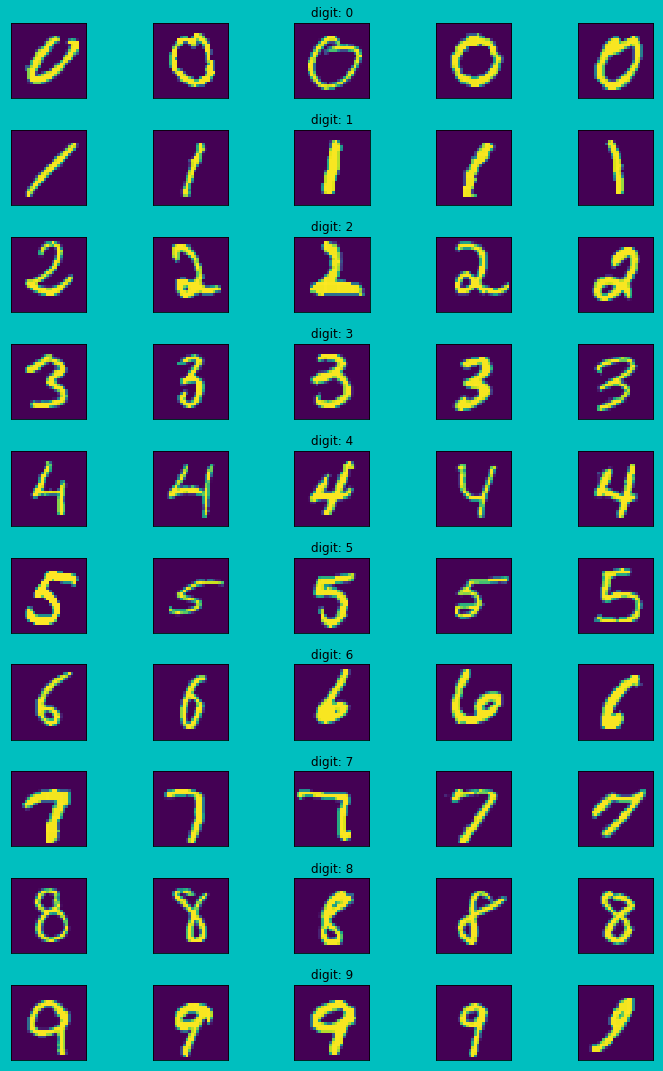

In [5]:
numSamples = []
rows = 10
cols = 5
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10,15))
fig.set_facecolor('c') #c for cyan
fig.tight_layout()
for i in range(0, cols):
    for j in range(0, rows):
        _x = X_train[y_train==j] #could iterate over a smaller set, but we need to count total number of samples per digit
        axes[j][i].imshow(_x[random.randint(0, len(_x)-1), :,:]) #could use cmap="gray"
        axes[j][i].set_xticks([]) #turns the tick marks off
        axes[j][i].set_yticks([])
        if(i == 2):
            axes[j][i].set_title("digit: %d" %j)
            numSamples.append(len(_x))

### Display training set distribution

([<matplotlib.axis.XTick at 0x7f1d25556da0>,
 <a list of 10 Text xticklabel objects>)

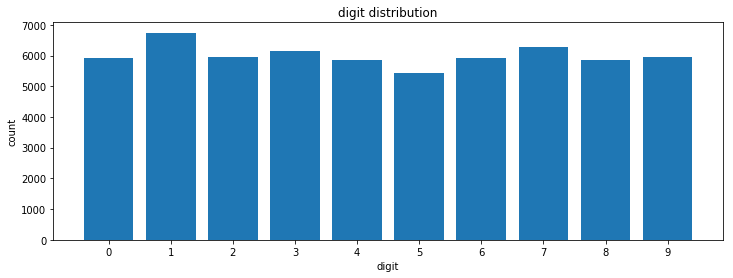

In [6]:
numSamples
plt.figure(figsize=(12,4))
plt.bar(range(0,rows), numSamples)
plt.title("digit distribution")
plt.xlabel("digit")
plt.ylabel("count")
plt.xticks(np.arange(0,10,1))

### Prepare the data
- use one hot encoding (to_categorical)
- normalize the data set, the math uses exponential numbers and e^1 is much smaller than e^255, also it ensures features are not misproportionally weighted
- add depth to the data set, each image is (28,28) ==> (28,28,1)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = X_train / 255
y_train = y_train / 255


### Create a CNN Model

In [8]:
model = leNetModel()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               205312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
__________

### Fit the model 

In [9]:
hist = model.fit(X_train, y_train, epochs=10, validation_split=.20, batch_size=510, verbose=1, shuffle=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 14s 267us/step - loss: 0.0011 - acc: 0.9128 - val_loss: 2.3202e-04 - val_acc: 0.9828
Epoch 2/10
51000/51000 [==============================] - 13s 257us/step - loss: 2.8941e-04 - acc: 0.9773 - val_loss: 1.7231e-04 - val_acc: 0.9874
Epoch 3/10
51000/51000 [==============================] - 15s 286us/step - loss: 2.0528e-04 - acc: 0.9840 - val_loss: 1.6354e-04 - val_acc: 0.9873
Epoch 4/10
51000/51000 [==============================] - 15s 285us/step - loss: 1.7938e-04 - acc: 0.9855 - val_loss: 1.4609e-04 - val_acc: 0.9890
Epoch 5/10
51000/51000 [==============================] - 15s 285us/step - loss: 1.6330e-04 - acc: 0.9863 - val_loss: 1.4841e-04 - val_acc: 0.9889
Epoch 6/10
51000/51000 [==============================] - 15s 290us/step - loss: 1.4401e-04 - acc: 0.9882 - val_loss: 1.5469e-04 - val_acc: 0.9877
Epoch 7/10
51000/51000 [==============================] - 14s 278us/step 

### Model performance
- good explaination of model loss and accuracy https://stackoverflow.com/questions/34518656/how-to-interpret-loss-and-accuracy-for-a-machine-learning-model
- the larger the gap between the validation and training loss / accuracy, the higher the chance that the model is overfitting

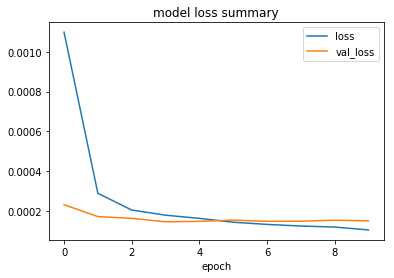

In [10]:
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.title("model loss summary")
plt.xlabel("epoch")
plt.legend()

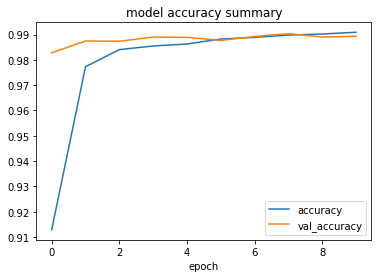

In [11]:
plt.plot(hist.history['acc'], label="accuracy")
plt.plot(hist.history['val_acc'], label="val_accuracy")
plt.title("model accuracy summary")
plt.xlabel("epoch")
plt.legend()

### Evaluate the model
- score is a measure of loss, accuracy is a measure of performance (see above link)

In [12]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print("model score: {:.2f}, accuracy: {:.2f}".format(score1[0], score1[1]))

model score: 0.23, accuracy: 0.99


### Test the models with a random image

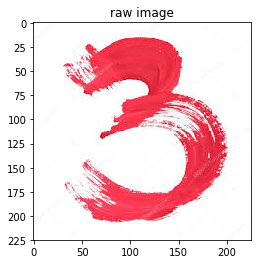

In [17]:
import cv2
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
res = requests.get(url, stream=True)
img = Image.open(res.raw)
plt.title("raw image")
plt.imshow(img)

(28, 28)


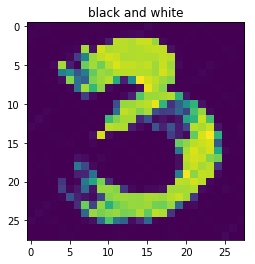

In [18]:
img = np.asarray(img)
img = cv2.resize(img, (28,28))
#need to invert the colors! (this is black on white, above digits are white on black)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
print(gray.shape)
plt.title("black and white")
plt.imshow(gray)

In [22]:
gray = gray/255
gray = gray.reshape(1, 28, 28, 1)

In [16]:
pred = model.predict_classes(gray)
print("model score: {:.2f}, accuracy: {:.2f}".format(score1[0], score1[1]))
print("model prediction: ", str(pred))

model score: 0.23, accuracy: 0.99
model prediction:  [3]


### Visualize the Convolution kernels

In [27]:
l1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
l2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [24]:
l1Viz, l2Viz = l1.predict(gray), l2.predict(gray)
print(l1Viz.shape)
print(l2Viz.shape)

(1, 26, 26, 32)
(1, 11, 11, 16)


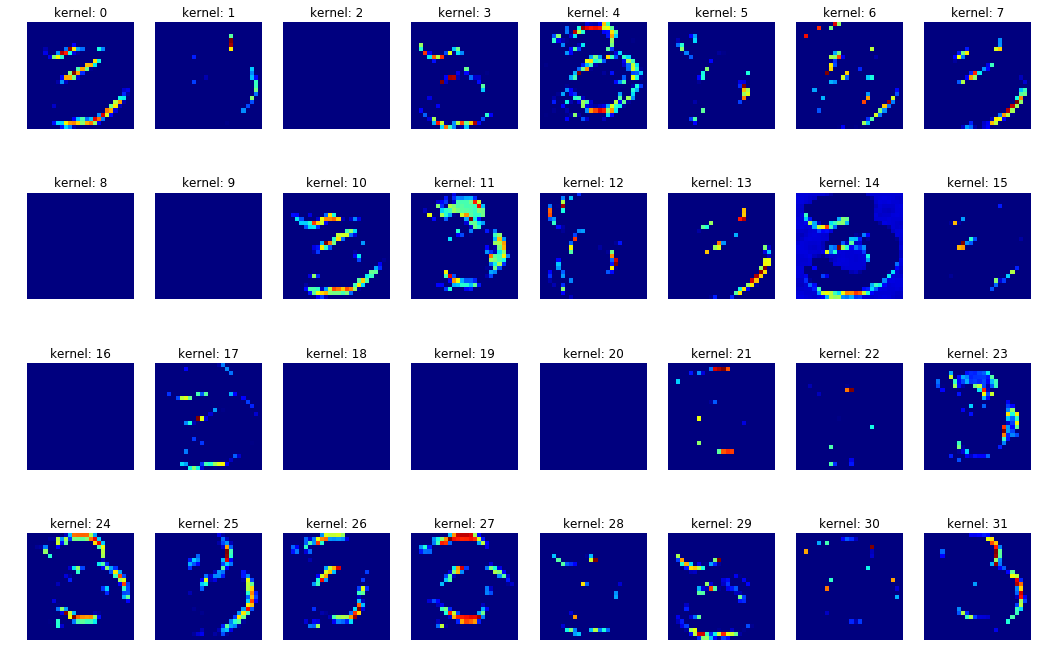

In [45]:
rows = 4
cols = 8
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18,12))
#fig.tight_layout()
for i in range(0,32):
    ax = plt.subplot(rows, cols, i+1)
    ax.imshow(l1Viz[0,:,:, i], cmap='jet')
    ax.set_title("kernel: %d" % (i))
    plt.axis('off')

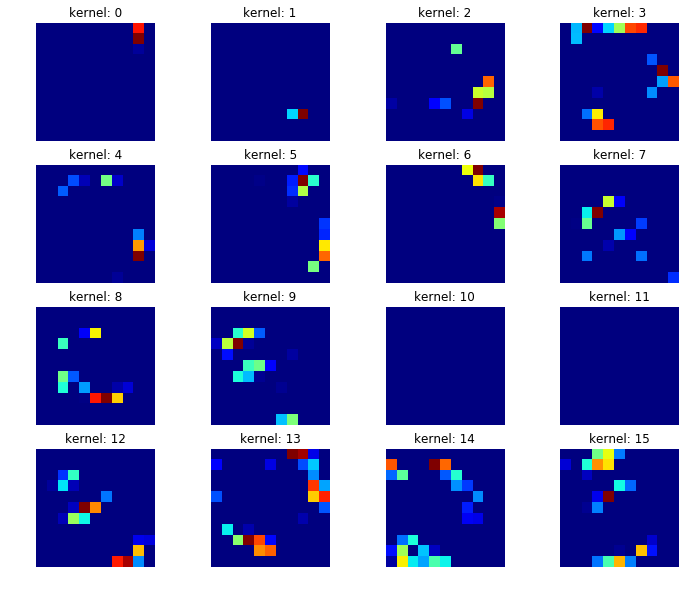

In [47]:
rows = 4
cols = 4
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10))
#fig.tight_layout()
for i in range(0,16):
    ax = plt.subplot(rows, cols, i+1)
    ax.imshow(l2Viz[0,:,:, i], cmap='jet')
    ax.set_title("kernel: %d" % (i))
    plt.axis('off')